In [36]:
import numpy as np 
import pandas as pd

%matplotlib inline 
import matplotlib.pyplot as plt

In [37]:
df = pd.read_csv('arrested.csv')

In [38]:
# Columns, dtypes, and missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129374 entries, 0 to 129373
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   _id                129374 non-null  int64 
 1   ARREST_YEAR        129374 non-null  int64 
 2   DIVISION           129374 non-null  object
 3   HOOD_158           129374 non-null  object
 4   NEIGHBOURHOOD_158  129374 non-null  object
 5   SEX                129374 non-null  object
 6   AGE_COHORT         129374 non-null  object
 7   AGE_GROUP          129374 non-null  object
 8   CATEGORY           129374 non-null  object
 9   SUBTYPE            129374 non-null  object
 10  ARREST_COUNT       129374 non-null  int64 
dtypes: int64(3), object(8)
memory usage: 10.9+ MB


In [39]:
df = df.rename(columns=str.lower)

In [40]:
df.isna().sum()

_id                  0
arrest_year          0
division             0
hood_158             0
neighbourhood_158    0
sex                  0
age_cohort           0
age_group            0
category             0
subtype              0
arrest_count         0
dtype: int64

In [41]:
print(f'Shape of the dataset: {df.shape}')

Shape of the dataset: (129374, 11)


In [42]:
text_columns = df.select_dtypes(include='object').columns
text_columns

Index(['division', 'hood_158', 'neighbourhood_158', 'sex', 'age_cohort',
       'age_group', 'category', 'subtype'],
      dtype='object')

In [43]:
df['arrest_year'].unique()

array([2019, 2022, 2018, 2015, 2014, 2020, 2021, 2016, 2017], dtype=int64)

In [44]:
for column in text_columns:
    print(df[column].unique())

['D14' 'D12' 'D22' 'D52' 'D43' 'D31' 'D33' 'D55' 'D32' 'D41' 'D11' 'D42'
 'NSA' 'D51' 'D53' 'D13' 'D23']
['83' '30' '165' '18' '78' '164' '143' '133' '22' '166' '43' '66' '27'
 '119' '111' '138' '44' '162' '12' '128' '61' '84' '130' 'NSA' '112' '73'
 '11' '148' '99' '69' '134' '158' '135' '125' '168' '96' '25' '120' '113'
 '90' '145' '161' '81' '63' '68' '56' '54' '122' '40' '42' '85' '60' '20'
 '107' '33' '67' '123' '171' '146' '163' '170' '53' '149' '79' '144' '97'
 '159' '70' '129' '7' '5' '74' '16' '142' '136' '174' '95' '173' '157'
 '109' '3' '57' '80' '139' '86' '31' '155' '91' '72' '88' '100' '153'
 '115' '87' '140' '154' '59' '106' '23' '110' '34' '13' '126' '71' '160'
 '47' '4' '32' '64' '38' '121' '151' '55' '124' '37' '167' '15' '21' '50'
 '62' '1' '169' '172' '36' '108' '49' '29' '92' '35' '152' '98' '101'
 '118' '147' '141' '156' '9' '28' '10' '52' '24' '39' '94' '6' '19' '65'
 '89' '8' '2' '116' '48' '103' '41' '150' '46' '102' '105' '58' '114']
['Dufferin Grove (83)' 'Br

In [45]:
# Create a dataframe where 'category' is Total Arrests only 
total_arrests_df = df[df['category'] == 'Total Arrests']
total_arrests_df

,_id,arrest_year,division,hood_158,neighbourhood_158,sex,age_cohort,age_group,category,subtype,arrest_count
108372,108373,2019,D41,120,Clairlea-Birchmount (120),Male,25 to 34,Adult,Total Arrests,Total Arrests,95
108373,108374,2022,D55,60,Woodbine-Lumsden (60),Male,18 to 24,Adult,Total Arrests,Total Arrests,2
108374,108375,2016,D12,113,Weston (113),Female,35 to 44,Adult,Total Arrests,Total Arrests,20
108375,108376,2019,D55,54,O'Connor-Parkview (54),Male,45 to 54,Adult,Total Arrests,Total Arrests,21
108376,108377,2017,D32,38,Lansing-Westgate (38),Male,65+,Adult,Total Arrests,Total Arrests,4
...,...,...,...,...,...,...,...,...,...,...,...
129369,129370,2018,D42,144,Morningside Heights (144),Male,18 to 24,Adult,Total Arrests,Total Arrests,32
129370,129371,2016,D14,78,Kensington-Chinatown (78),Male,18 to 24,Adult,Total Arrests,Total Arrests,71
129371,129372,2018,D14,80,Palmerston-Little Italy (80),Female,<18,Youth,Total Arrests,Total Arrests,1
129372,129373,2021,D31,154,Oakdale-Beverley Heights (154),Female,18 to 24,Adult,Total Arrests,Total Arrests,5


In [46]:
# by_year_age = total_arrests_df.groupby(['arrest_year','age_group'])
# by_year = total_arrests_df.groupby(['arrest_year'])

In [47]:
def total_only_f(dataframe: pd.DataFrame) -> pd.DataFrame:
    
    # Create a dataframe where 'category' is Total Arrests only 
    total_data = dataframe[dataframe['category'] == 'Total Arrests']

    return total_data

In [48]:
def by_year_f(dataframe: pd.DataFrame) -> pd.DataFrame:
    # Group rows by year
    by_group = dataframe.groupby(['arrest_year'])

    # Add up all Total Arrests for each year
    year_sum = by_group.agg(arrest_count = ('arrest_count', 'sum'))

    return year_sum

In [49]:
total_df = total_only_f(df)
by_year = by_year_f(total_df)
by_year

,arrest_count
arrest_year,
2014,31919
2015,27370
2016,27488
2017,26743
2018,25753
2019,25271
2020,20110
2021,20778
2022,24592


In [50]:
def plotby_year_f(data: pd.DataFrame,column):
    fig,ax = plt.subplots()
    ax.set_axisbelow(True)
    ax.grid(alpha=0.3)   

    offset=0.7
    count = ax.bar(data.index, data[column], width=offset)

    ax.set_title(f'{column} by year, Toronto')
    ax.set_xlabel('Year')
    ax.set_ylabel('Counts')
    

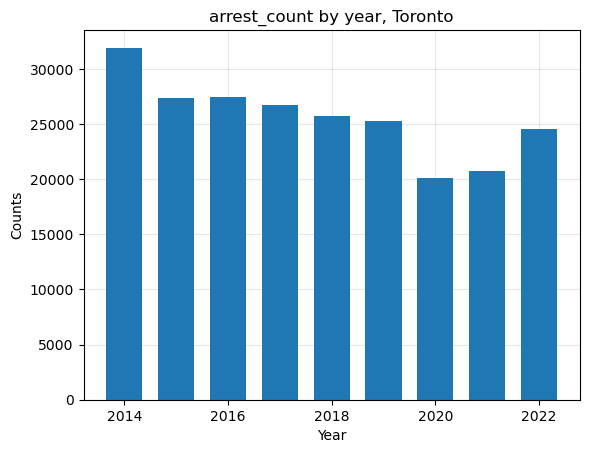

In [51]:
plotby_year_f(by_year,'arrest_count')

In [52]:
def conditions_f(row):    
    if row["age_group"] == 'Adult':
        row['_adult'] = row['arrest_count']
        row['_youth'] = 0
    elif row["age_group"] == 'Youth':
        row['_adult'] = 0
        row['_youth'] = row['arrest_count']
    return row[['_adult','_youth']]


In [53]:
def by_year_age_f(data: pd.DataFrame) -> pd.DataFrame:

    # Group rows by year
    year_age_group = data.groupby(['arrest_year','age_group'])

    # Add up all Total Arrests for each year
    year_age_sum = year_age_group.agg(arrest_count = ('arrest_count', 'sum')).reset_index()

    # dropping unknown age_group
    year_age_sum = year_age_sum.drop(year_age_sum[year_age_sum['age_group'] == 'Unknown'].index)  

    # create columns '_adult', '_youth' based on 'age_group
    year_age_sum[['_adult','_youth']] = year_age_sum.apply(conditions_f, axis=1)

    # drop 'age_group' and 'arrest_count' because these values have been moved to '_adult','_youth'
    year_age_sum = year_age_sum.drop(['age_group', 'arrest_count'], axis=1)

    # group by year 
    year_age_group = year_age_sum.groupby(['arrest_year']).agg(adult=('_adult','sum'),
                                       youth=('_youth','sum')).reset_index()

    return year_age_group

In [187]:
# year_sum = by_year.agg(arrest_count = ('arrest_count', 'sum'))
# year_sum

,arrest_count
arrest_year,
2014,31919
2015,27370
2016,27488
2017,26743
2018,25753
2019,25271
2020,20110
2021,20778
2022,24592


In [55]:
year_age_df = by_year_age_f(total_df)
year_age_df

,arrest_year,adult,youth
0,2014,28991,2925
1,2015,25026,2343
2,2016,25112,2376
3,2017,24360,2383
4,2018,23825,1928
5,2019,23445,1826
6,2020,19094,1016
7,2021,19851,927
8,2022,23323,1269


In [56]:
def plotby_year_age_f(data):
    barWidth = 0.35

    # Set the position of the bars on the x-axis
    r1 = np.arange(len(data['arrest_year']))
    r2 = [x + barWidth for x in r1]

    # Create the bar plots
    plt.bar(r1, data['adult'], color='#7f6d5f', width=barWidth, edgecolor='white', label='Adult')
    plt.bar(r2, data['youth'], color='#557f2d', width=barWidth, edgecolor='white', label='Youth')

    # Add x-axis and y-axis labels and a title
    plt.xlabel('Year')
    plt.ylabel('Counts')
    plt.title('Arrest Counts by Year & Age group, Toronto')

    # Add legend
    plt.legend()

    #plt.show()


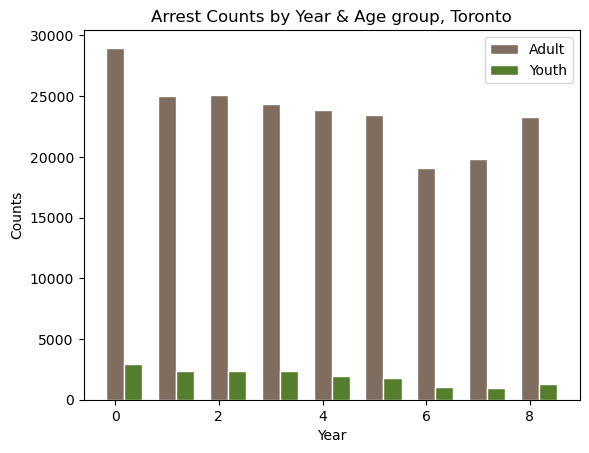

In [191]:
plotby_year_age_f(year_age_df)